In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [112]:
# Loading the dataset
titanic_df = pd.read_csv("../data/titanic_train.csv")

In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Cleaning continuous variables
#### Clean missing values for Age

In [116]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

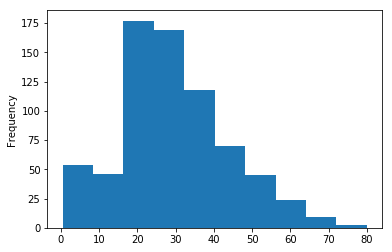

In [117]:
titanic_df['Age'].plot(kind='hist')

In [118]:
# Since this feature is missing at random (MAR) we replace the missing values with the mean of available values.
# We can also find, if the missing data is MCAR using Little's MCAR test.
# https://impyute.readthedocs.io/en/master/user_guide/diagnostics.html#little-s-mcar-test-1

titanic_df['Age'].fillna(df['Age'].mean(),inplace=True)

In [119]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the EDA of the 2 features SibSP and Parch where we concluded that higher is the value for either of these feature less likely is a person to survive. Hence, combining the 2 features into a single feeature since both of them indicate similar meaning to the target variable.

In [122]:
titanic_df['family_cnt'] = titanic_df['SibSp'] + titanic_df['Parch']

Since, family_cnt feature noe represents both SibSp and Parch, these 2 features are repetitive and can be dropped.
Dropping PassengerId since it's an identifier.

In [123]:
# dropping columns that are not required

titanic_df.drop(labels=['SibSp','Parch','PassengerId'],axis=1,inplace=True)

In [124]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


#### Converting gender to numeric 

In [125]:
titanic_df.replace(to_replace={"male":0,"female":1},inplace=True)

In [126]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


In [127]:
titanic_df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
family_cnt      0
dtype: int64

Checking if many missing values for feature `cabin`, relate with their survival chances in any way.

In [128]:
titanic_df[titanic_df['Cabin'].isnull()]['Survived'].sum()

206

In [129]:
titanic_df[titanic_df['Cabin'].isnull()]['Survived'].mean()

0.29985443959243085

Out of 687 people with Null value for feature `cabin`, 30% people survived.

In [130]:
titanic_df[titanic_df['Cabin'].isnull()==False]['Survived'].mean()

0.6666666666666666

In [131]:
titanic_df[titanic_df['Cabin'].isnull()==False]['Survived'].sum()

136

In [132]:
titanic_df[titanic_df['Cabin'].isnull()==False].count()

Survived      204
Pclass        204
Name          204
Sex           204
Age           204
Ticket        204
Fare          204
Cabin         204
Embarked      202
family_cnt    204
dtype: int64

Out of 204 people with some value for feature `cabin`, 67% people survived.

In [133]:
titanic_df.groupby(titanic_df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

People with No value for cabin actually had lower chances of surviving. 

Hence, the feature `cabin` is not missing at random.

In [134]:
# Creating a column for indicating presence of cabin for a passenger
titanic_df['cabin_indicator'] = np.where(titanic_df['Cabin'].isnull(),0,1)

In [135]:
titanic_df['cabin_indicator'].sum()

204

In [136]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt,cabin_indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [137]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [140]:
titanic_df.groupby("Embarked")['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Different percentage of people boarding at different places had different chances of survival. Howwver, the feature `Embarked` is not a cause for survival, since the gender and cabin are related to `Embarked` in a way that different % of people were women and different % of people had cabin. Hence, gender and cabin being the real contributors to surval, we can drop `Emabarked` feature.

#### Dropping unnecessary variables

1. Dropping Cabin since it's repetitive to have cabin indicator along with it.
2. Name and ticket are identifiers and donot determine if a passenger survived or not.
3. Dropping Embarked.

In [107]:
titanic_df.drop(['Ticket','Cabin','Embarked','Name'],axis=1,inplace=True)

In [110]:
# Writing out cleaned data
titanic_df.to_csv("../data/titanic_cleaned.csv",index=False)

#### Preparing data for training, validation and testing

In [144]:
features = titanic_df.drop('Survived',axis=1)
labels = titanic_df['Survived']

In [146]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=1)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=1)

#### Persisting the datasets

In [150]:
x_train.to_csv("../data/x_train.csv",index=False)
x_val.to_csv("../data/x_val.csv",index=False)
x_test.to_csv("../data/x_test.csv",index=False)
y_train.to_csv("../data/y_train.csv",index=False)
y_val.to_csv("../data/y_val.csv",index=False)
y_test.to_csv("../data/y_test.csv",index=False)